## 6.4 Machine Learning Part 1

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\bulle\Documents\Python Scripts\Achievement6'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data','movie_data_pythonclean.csv'), index_col = 0, encoding='ISO-8859-1')

### 2. Data cleaning

In [5]:
df.columns

Index(['movie_title', 'duration', 'title_year', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'language', 'country',
       'content_rating', 'num_critic_for_reviews', 'director_facebook_likes',
       'budget', 'gross', 'genres', 'cast_total_facebook_likes', 'imdb_score',
       'color', 'plot_keywords'],
      dtype='object')

In [6]:
df.head(20)

,movie_title,duration,title_year,director_name,actor_1_name,actor_2_name,actor_3_name,language,country,content_rating,num_critic_for_reviews,director_facebook_likes,budget,gross,genres,cast_total_facebook_likes,imdb_score,color,plot_keywords
3,9,112,1986,Adrian Lyne,David Margulies,Karen Young,Kim Chan,English,USA,R,38,213,17000000,6734844,Drama|Romance,711,5,Color,blindfolded woman|control|male dominance|sex g...
4,9,79,2009,Shane Acker,Martin Landau,Alan Oppenheimer,Tom Kane,English,USA,PG-13,263,30,30000000,31743332,Action|Adventure|Animation|Drama|Mystery|Sci-F...,1594,7,Color,hope|key|machine|number|rag doll
5,21,123,2008,Robert Luketic,Kevin Spacey,Jim Sturgess,Josh Gad,English,USA,PG-13,144,126,35000000,81159365,Crime|Drama|Thriller,25661,6,Color,based on true story|blackjack|card counting|ga...
6,42,128,2013,Brian Helgeland,Harrison Ford,Christopher Meloni,Nicole Beharie,English,USA,PG-13,216,241,40000000,95001343,Biography|Drama|Sport,16911,7,Color,baseball|baseball player|brooklyn dodgers|majo...
7,54,121,1998,Mark Christopher,Salma Hayek,Ellen Albertini Dow,Sela Ward,English,USA,R,63,15,13000000,16574731,Drama|Music,6910,5,Color,angel dust the drug|disco|new york city|quaalu...
8,300,117,2006,Zack Snyder,Gerard Butler,Michael Fassbender,Vincent Regan,English,USA,R,460,0,65000000,210592590,Action|Drama|Fantasy|War,32360,7,Color,battle|epic|greece|spartan|warrior
9,1408,114,2007,Mikael HÃÂ´fstrÃÂ¦m,Drew Powell,Kim Thomson,Alexandra Silber,English,USA,PG-13,314,101,25000000,71975611,Fantasy|Horror,214,6,Color,book|debunking|evil|hotel|paranormal phenomena
11,1911,121,2011,Li Zhang,Bingbing Li,Joan Chen,Jaycee Chan,Mandarin,China,R,63,0,18000000,127437,Action|Adventure|Drama|History|War,1887,6,Color,china|disarming someone|qing dynasty|stabbed w...
14,2012,158,2009,Roland Emmerich,Oliver Platt,Liam James,Tom McCarthy,English,USA,PG-13,367,776,200000000,166112167,Action|Adventure|Sci-Fi,2144,5,Color,ark|catastrophe|geologist|president|writer
15,2046,129,2004,Kar-Wai Wong,Li Gong,Tony Chiu Wai Leung,Maggie Cheung,Cantonese,Hong Kong,R,194,0,12000000,261481,Drama|Romance|Sci-Fi,2378,7,Black and White,number in title|train|woman slaps a man|woman ...


In [7]:
df.shape

(3789, 19)

##### Missing values

In [8]:
# Check for missing values

df.isnull().sum()
# No missing values to handle

movie_title                   0
duration                      0
title_year                    0
director_name                 0
actor_1_name                  3
actor_2_name                  5
actor_3_name                 10
language                      0
country                       0
content_rating               50
num_critic_for_reviews        0
director_facebook_likes       0
budget                        0
gross                         0
genres                        0
cast_total_facebook_likes     0
imdb_score                    0
color                         0
plot_keywords                29
dtype: int64

##### Duplicates check

In [9]:
dups = df.duplicated()

In [10]:
dups.shape # No dups

(3789,)

##### Extreme values checks

D:\CareerFoundry\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_critic_for_reviews', ylabel='Density'>

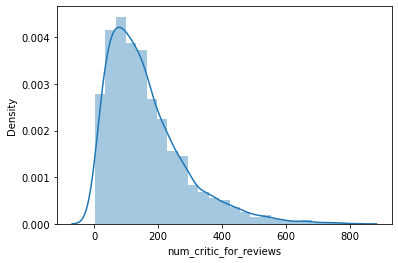

In [11]:
sns.distplot(df['num_critic_for_reviews'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [12]:
df['num_critic_for_reviews'].mean() # Check the mean

160.78701504354711

In [13]:
df['num_critic_for_reviews'].median() # Check the median

131.0

In [14]:
df['num_critic_for_reviews'].max() # Check the max

813

### 3. Data prep for regression analysis 

## Scatterplots

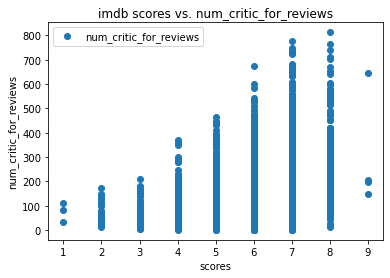

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'imdb_score', y='num_critic_for_reviews',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('imdb scores vs. num_critic_for_reviews')  
plt.xlabel('scores')  
plt.ylabel('num_critic_for_reviews')  
plt.show()

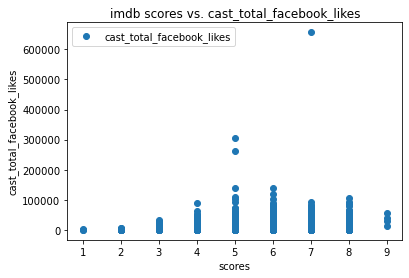

In [16]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'imdb_score', y='cast_total_facebook_likes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('imdb scores vs. cast_total_facebook_likes')  
plt.xlabel('scores')  
plt.ylabel('cast_total_facebook_likes')  
plt.show()

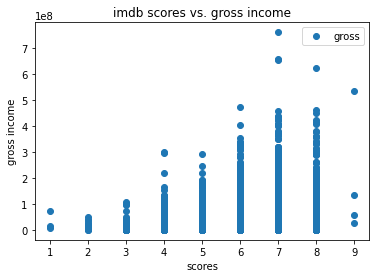

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'imdb_score', y='gross',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('imdb scores vs. gross income')  
plt.xlabel('scores')  
plt.ylabel('gross income')  
plt.show()

Hypothesis: The higher the imdb score the movie is, the more number of critic reviews it gets.

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['imdb_score'].values.reshape(-1,1)
y = df['num_critic_for_reviews'].values.reshape(-1,1)

In [19]:
X

array([[5],
       [7],
       [6],
       ...,
       [6],
       [4],
       [4]], dtype=int64)

In [20]:
y

array([[ 38],
       [263],
       [144],
       ...,
       [135],
       [226],
       [ 63]], dtype=int64)

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

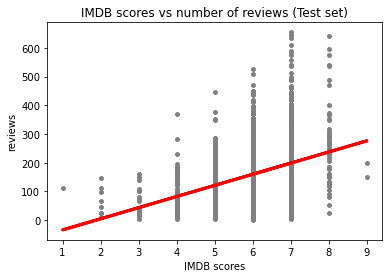

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('IMDB scores vs number of reviews (Test set)')
plot_test.xlabel('IMDB scores')
plot_test.ylabel('reviews')
plot_test.show()

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[38.77056202]]
Mean squared error:  12454.48627171594
R2 score:  0.11364247277847828


This regression has a positive realationship since the slope is going up. Mean squared error is too large to be a good model to represent the data. The R2 score is 0.11 which is not a good fit either.

In [28]:
y_predicted

array([[198.82518062],
       [198.82518062],
       [160.0546186 ],
       ...,
       [160.0546186 ],
       [121.28405658],
       [160.0546186 ]])

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,69,198.825181
1,81,198.825181
2,113,160.054619
3,177,237.595743
4,79,198.825181
5,145,160.054619
6,129,237.595743
7,74,198.825181
8,153,237.595743
9,35,160.054619


##### Compare how the regression fits the training set

In [51]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

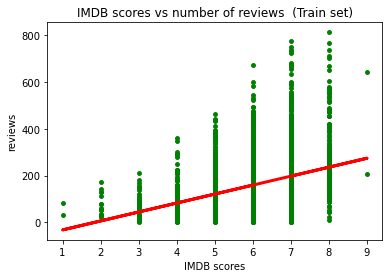

In [52]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('IMDB scores vs number of reviews  (Train set)')
plot_test.xlabel('IMDB scores')
plot_test.ylabel('reviews')
plot_test.show()

In [53]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[38.29684718]]
Mean squared error:  13731.343790002948
R2 score:  0.11447922143296463


Both Training set and test set have low score. It's performing bad which considered as underfitting.